<a href="https://colab.research.google.com/github/ViswaAvailable/Pattern-Recognition/blob/main/PatternProjectCorrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set contains 566602 records, the data dictionary is provided as below:

1. ***id***: The identification number of the patient.

2. ***sex***: Identify gender of the patient, 1 as female and 2 as male.

3. ***patient_type***: Type of patient, 1 for not hospitalized and 2 for hosptalized.

4. ***entry_date***: The date that the patient went to the hospital.

5. ***date_symptom***s: The date that the patient started to show symptoms.

6. ***date_died***: The date that the patient died, "9999-99-99" stands for recovered.

7. ***intubed***: Intubation is a procedure that's used when you can't breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). "1" denotes that the patient used ventilator and "2" denotes that the patient did not, "97" "98" "99" means not specified.

8. ***pneumonia***: Indicates whether the patient already have air sacs inflammation or not "1" for yes, "2" for no, "97" "98" "99" means not specified.

9. ***age***: Specifies the age of the patient.

10. ***pregnancy***: Indicates whether the patient is pregnant or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

11. ***diabetes***: Indicates whether the patient has diabetes or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

12. ***copd***: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

13. ***asthma***: Indiactes whether the patient has asthma or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

14. ***inmsupr***: Indicates whether the patient is immunosuppressed or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

15. ***hypertension***: Indicates whether the patient has hypertension or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

16. ***other_disease***: Indicates whether the patient has other disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

17. ***cardiovascular***: Indicates whether if the patient has heart or blood vessels realted disease, "1" for yes, "2" for no, "97" "98" "99" means not specified.

18. ***obesity***: Indicates whether the patient is obese or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

19. ***renal_chronic***: Indicates whether the patient has chronic renal disease or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

20. ***tobacco***: Indicates whether if the patient is a tobacco user, "1" for yes, "2" for no, "97" "98" "99" means not specified.

21. ***contact_other_covid***: Indicates whether if the patient has contacted another covid19 patient.

22. ***icu***: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), "1" for yes, "2" for no, "97" "98" "99" means not specified.



In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/covid.csv")
index = data.index
number_of_rows = len(index)
#number_of_rows
data.columns




Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

### PHASE I - Data Interpretation 

In [ ]:
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2



A new column death is created which when equal to 1 means the patient has died and 0 meaning otherwise 

In [ ]:
for column in data[['date_died']]:
  data["death"]=data['date_died'].apply(lambda x: 1 if (x=="9999-99-99") else 0)
data.iloc[0:7,]

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,1
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,1
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,1
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,1
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,0
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1,0
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2,1


Convert the date columns to data.time 

In [ ]:
# Fix date data
data.entry_date = pd.to_datetime(data.entry_date, dayfirst=True, errors='coerce')
data.date_symptoms = pd.to_datetime(data.date_symptoms, dayfirst=True, errors='coerce')
data.date_died = pd.to_datetime(data.date_died, dayfirst=True, errors='coerce')


We define duration as the time (day) between the day the symptoms started showing and the day the patient went to the hospital for check up

In [ ]:
data['Duration'] = data.entry_date - data.date_symptoms
data

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death,Duration
0,16169f,2,1,2020-05-04,2020-05-02,NaT,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,1,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,1,2 days
2,167386,1,2,2020-04-06,2020-04-01,NaT,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,1,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,1,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,NaT,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97,1,10 days
566598,047cd1,1,1,2020-04-07,2020-04-06,NaT,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97,1,1 days
566599,1beb81,1,2,2020-05-14,2020-05-01,NaT,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2,1,13 days
566600,16fb02,1,1,2020-05-31,2020-05-29,NaT,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97,1,2 days


ICU has 5 different values 

In [ ]:
data['icu'].unique()

array([97,  2,  1, 99])

Since only values 1,2 mean something, the others are mapped to 3 and also channging 1-0 and 2-1 for binary interpretation

In [ ]:
data['icu']=data['icu'].map({1:0,2:1,97:np.nan,99:np.nan})

A new column death is created based of Date_died

In [ ]:
data.dtypes

id                              object
sex                              int64
patient_type                     int64
entry_date              datetime64[ns]
date_symptoms           datetime64[ns]
date_died               datetime64[ns]
intubed                          int64
pneumonia                        int64
age                              int64
pregnancy                        int64
diabetes                         int64
copd                             int64
asthma                           int64
inmsupr                          int64
hypertension                     int64
other_disease                    int64
cardiovascular                   int64
obesity                          int64
renal_chronic                    int64
tobacco                          int64
contact_other_covid              int64
covid_res                        int64
icu                            float64
death                            int64
Duration               timedelta64[ns]
dtype: object

### PHASE II - Data Cleaning and Visualization

In [ ]:
data

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death,Duration
0,16169f,2,1,2020-05-04,2020-05-02,NaT,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,NaN,1,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,NaN,1,2 days
2,167386,1,2,2020-04-06,2020-04-01,NaT,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,1.0,1,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,1.0,1,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,1.0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,NaT,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,NaN,1,10 days
566598,047cd1,1,1,2020-04-07,2020-04-06,NaT,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,1 days
566599,1beb81,1,2,2020-05-14,2020-05-01,NaT,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,1.0,1,13 days
566600,16fb02,1,1,2020-05-31,2020-05-29,NaT,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,2 days


Mapping 97 & 98 categories to category 3 which is NA
and also channging 1-0 and 2-1 for binary interpretation

In [ ]:
data['intubed']=data['intubed'].map({1:1,2:2,3:np.nan})
data

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death,Duration
0,16169f,2,1,2020-05-04,2020-05-02,NaT,NaN,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,NaN,1,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,NaN,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,NaN,1,2 days
2,167386,1,2,2020-04-06,2020-04-01,NaT,2.0,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,1.0,1,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,2.0,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,1.0,1,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,2.0,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,1.0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,NaT,NaN,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,NaN,1,10 days
566598,047cd1,1,1,2020-04-07,2020-04-06,NaT,NaN,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,1 days
566599,1beb81,1,2,2020-05-14,2020-05-01,NaT,2.0,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,1.0,1,13 days
566600,16fb02,1,1,2020-05-31,2020-05-29,NaT,NaN,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,2 days


Mapping 97 & 98 categories to category 3 which is NA

In [ ]:
data['pregnancy']=data['pregnancy'].map({1:0,2:1,97:np.nan})
data

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death,Duration
0,16169f,2,1,2020-05-04,2020-05-02,NaT,NaN,2,27,NaN,2,2,2,2,2,2,2,2,2,2,2,1,NaN,1,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,NaN,2,24,NaN,2,2,2,2,2,2,2,2,2,2,99,1,NaN,1,2 days
2,167386,1,2,2020-04-06,2020-04-01,NaT,2.0,2,54,1.0,2,2,2,2,2,2,2,1,2,2,99,1,1.0,1,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,2.0,1,30,NaN,2,2,2,2,2,2,2,2,2,2,99,1,1.0,1,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,2.0,2,60,1.0,1,2,2,2,1,2,1,2,2,2,99,1,1.0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,NaT,NaN,2,58,NaN,1,2,2,2,2,2,2,2,2,2,2,3,NaN,1,10 days
566598,047cd1,1,1,2020-04-07,2020-04-06,NaT,NaN,2,48,1.0,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,1 days
566599,1beb81,1,2,2020-05-14,2020-05-01,NaT,2.0,1,49,1.0,2,2,2,2,2,2,2,1,2,2,99,3,1.0,1,13 days
566600,16fb02,1,1,2020-05-31,2020-05-29,NaT,NaN,1,43,1.0,2,2,2,2,2,2,2,2,2,2,2,3,NaN,1,2 days


Mapping 97 & 98 categories to category 3 which is NA
and also channging 1-0 and 2-1 for binary interpretation

In [ ]:

data['diabetes']=data['diabetes'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data




,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death,Duration
0,16169f,2,1,2020-05-04,2020-05-02,NaT,NaN,2,27,NaN,1.0,2,2,2,2,2,2,2,2,2,2,1,NaN,1,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,NaN,2,24,NaN,1.0,2,2,2,2,2,2,2,2,2,99,1,NaN,1,2 days
2,167386,1,2,2020-04-06,2020-04-01,NaT,2.0,2,54,1.0,1.0,2,2,2,2,2,2,1,2,2,99,1,1.0,1,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,2.0,1,30,NaN,1.0,2,2,2,2,2,2,2,2,2,99,1,1.0,1,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,2.0,2,60,1.0,0.0,2,2,2,1,2,1,2,2,2,99,1,1.0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,NaT,NaN,2,58,NaN,0.0,2,2,2,2,2,2,2,2,2,2,3,NaN,1,10 days
566598,047cd1,1,1,2020-04-07,2020-04-06,NaT,NaN,2,48,1.0,1.0,2,2,2,2,2,2,2,2,2,2,3,NaN,1,1 days
566599,1beb81,1,2,2020-05-14,2020-05-01,NaT,2.0,1,49,1.0,1.0,2,2,2,2,2,2,1,2,2,99,3,1.0,1,13 days
566600,16fb02,1,1,2020-05-31,2020-05-29,NaT,NaN,1,43,1.0,1.0,2,2,2,2,2,2,2,2,2,2,3,NaN,1,2 days


Mapping 97 & 98 categories to category 3 which is NA
and also channging 1-0 and 2-1 for binary interpretation.
Now, for particulary sex, 1 means male and 0 means female

In [ ]:
data['copd']=data['copd'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['asthma']=data['asthma'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['hypertension']=data['hypertension'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['other_disease']=data['other_disease'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['renal_chronic']=data['renal_chronic'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['tobacco']=data['tobacco'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['inmsupr']=data['inmsupr'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['cardiovascular']=data['cardiovascular'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['obesity']=data['obesity'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['contact_other_covid']=data['contact_other_covid'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})
data['sex']=data['sex'].map({1:0,2:1})
data['pneumonia']=data['pneumonia'].map({1:0,2:1,97:np.nan,98: np.nan,99:np.nan})




In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import missingno as msno

Plotting a histogram of missing data 

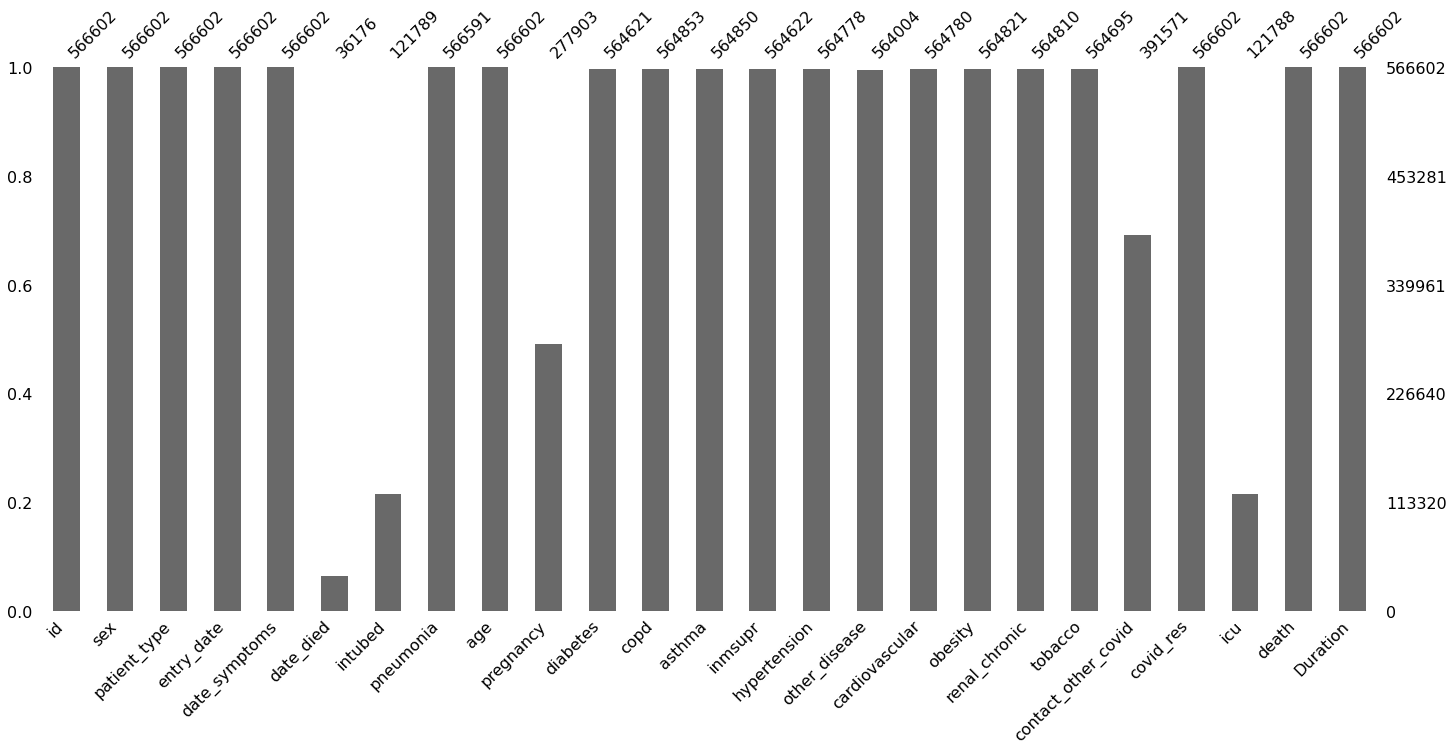

In [ ]:
msno.bar(data)

Since the column ID has no use, we are dropping it

In [ ]:
data.drop(['id','covid_res'], axis=1,inplace=True)


In [ ]:
data

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,death,Duration
0,1,1,2020-05-04,2020-05-02,NaT,NaN,1.0,27,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1,2 days
1,1,1,2020-03-19,2020-03-17,NaT,NaN,1.0,24,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1,2 days
2,0,2,2020-04-06,2020-04-01,NaT,2.0,1.0,54,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,1,5 days
3,1,2,2020-04-17,2020-04-10,NaT,2.0,0.0,30,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1,7 days
4,0,2,2020-04-13,2020-04-13,2020-04-22,2.0,1.0,60,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,1,1,2020-05-13,2020-05-03,NaT,NaN,1.0,58,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1,10 days
566598,0,1,2020-04-07,2020-04-06,NaT,NaN,1.0,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1,1 days
566599,0,2,2020-05-14,2020-05-01,NaT,2.0,0.0,49,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,1,13 days
566600,0,1,2020-05-31,2020-05-29,NaT,NaN,0.0,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1,2 days


In [ ]:
import seaborn as sns

Visualisation of missing data using heatmap

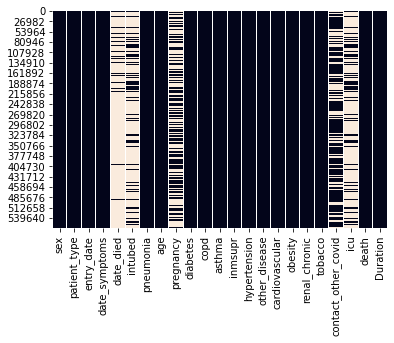

In [ ]:
sns.heatmap(data.isna(), cbar=False)

In this project, I decided to discard pregnancy, contact_other_covid, covid_res, icu and intubed. These variables have significant portion of missing value (>80%)

In [ ]:
data.drop(['date_died'], axis=1,inplace=True )
data.drop(['pregnancy'], axis=1,inplace=True)
data.drop(['icu'], axis=1,inplace=True)
data.drop(['intubed'], axis=1,inplace=True)
data.drop(['patient_type'], axis=1,inplace=True)


Removing all the NA values. 

In [ ]:
data = data.dropna()
data

,sex,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,death,Duration
0,1,2020-05-04,2020-05-02,1.0,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2 days
7,0,2020-05-21,2020-05-18,1.0,56,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,3 days
13,0,2020-05-25,2020-05-23,1.0,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,2 days
15,0,2020-06-20,2020-06-16,1.0,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,4 days
16,0,2020-06-24,2020-06-15,1.0,49,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566596,1,2020-05-05,2020-05-02,1.0,46,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,3 days
566597,1,2020-05-13,2020-05-03,1.0,58,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,10 days
566598,0,2020-04-07,2020-04-06,1.0,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1 days
566600,0,2020-05-31,2020-05-29,0.0,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2 days


In [ ]:
data.drop(['entry_date','date_symptoms'],axis=1,inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,death,Duration
0,1,1.0,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2 days
7,0,1.0,56,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,3 days
13,0,1.0,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,2 days
15,0,1.0,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,4 days
16,0,1.0,49,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,9 days


Now, Let's find the correlation between the different parameters to death 

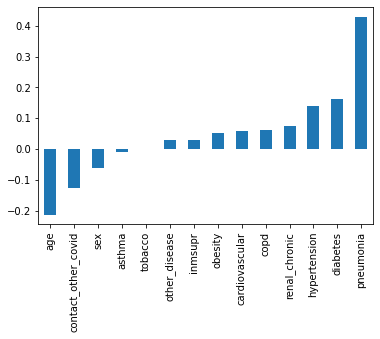

In [ ]:
data.corr()['death'][:-1].sort_values().plot(kind='bar')

In [ ]:
data['death'].value_counts()

1    375143
0     13712
Name: death, dtype: int64

Visualising the number of people died

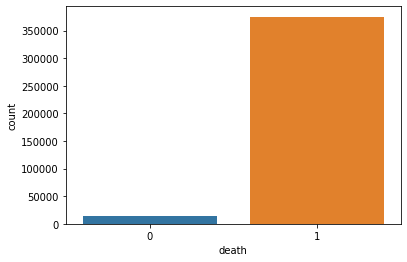

In [ ]:
sns.countplot(x=data['death'])
plt.show()

Taking a particular factor and seeing its role in deaths

Text(0.5, 1.0, 'Casualties who had hypertension')

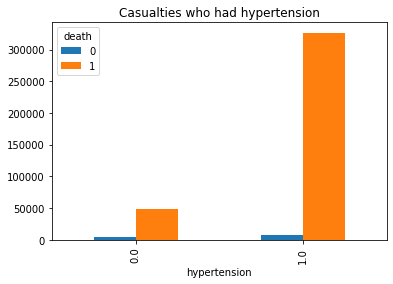

In [ ]:
pd.crosstab(data.hypertension,data.death).plot(kind='bar')
plt.title('Casualties who had hypertension')



Plotting Histogram of deaths varied with age


Most of the deaths is between the age group 24 to 45

Text(0.5, 0, 'Age')

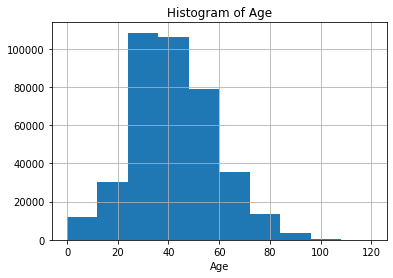

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')


### PHASE III - Fitting a logistic regression Model and finding the confidence level and accuracy 

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
data.columns

Index(['sex', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'death', 'Duration'],
      dtype='object')

In [ ]:
cat_vars=['sex', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['sex', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['death', 'Duration', 'sex_0', 'sex_1', 'pneumonia_0.0',
       'pneumonia_1.0', 'age_0', 'age_1', 'age_2', 'age_3', 'age_4',
       'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11',
       'age_12', 'age_13', 'age_14', 'age_15', 'age_16', 'age_17',
       'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23',
       'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29',
       'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35',
       'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41',
       'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47',
       'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53',
       'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59',
       'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65',
       'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71',
       'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77',
       'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'a

In [ ]:
data.dtypes

sex                              int64
pneumonia                      float64
age                              int64
diabetes                       float64
copd                           float64
asthma                         float64
inmsupr                        float64
hypertension                   float64
other_disease                  float64
cardiovascular                 float64
obesity                        float64
renal_chronic                  float64
tobacco                        float64
contact_other_covid            float64
death                            int64
Duration               timedelta64[ns]
dtype: object

In [ ]:
#data.apply(pd.to_numeric)
#'sex_0', 'sex_1', 'pneumonia_0.0',
#       'pneumonia_1.0',
#       'diabetes_0.0', 'diabetes_1.0', 'copd_0.0', 'copd_1.0',
#       'asthma_0.0', 'asthma_1.0', 'inmsupr_0.0', 'inmsupr_1.0',
#       'hypertension_0.0', 'hypertension_1.0', 'other_disease_0.0',
#       'other_disease_1.0', 'cardiovascular_0.0', 'cardiovascular_1.0',
#       'obesity_0.0', 'obesity_1.0', 'renal_chronic_0.0',
#       'renal_chronic_1.0', 'tobacco_0.0', 'tobacco_1.0',

Finding the P value:

It is visible from the summary that almost all are reponsible for the deaths as P-vlaue <0.05

In [ ]:
cols=['pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid']
X=data[cols]
y=data['death']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()




Optimization terminated successfully.
         Current function value: 0.094943
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.378     
Dependent Variable:  death             AIC:               73861.7384
Date:                2020-08-20 19:27  BIC:               73992.1900
No. Observations:    388855            Log-Likelihood:    -36919.   
Df Model:            11                LL-Null:           -59333.   
Df Residuals:        388843            LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      9.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
pneumonia            3.7632   0.0273 138.0634 0.0000  3.7098  3.8166
diabetes             0.4967   0.0227  21.9086 0.0000  0.4523  0.5412
copd                 0.2922   0.0473   6.1816 0.0000  0.1996  0.3849
asthma              -0.1364   0.0555  -2.4562 0.0140 -0.2452 -0.0275
inmsupr              0.1593   0.0545   2.9202 0.0035  0.0524  0.2662
hypertension         0.4349   0.0227  19.1723 0.0000  0.3905  0.4794
other_disease        0.0976   0.0527   1.8499 0.0643 -0.0058  0.2009
cardiovascular       0.1937   0.0436   4.4449 0.0000  0.1083  0.2791
obesity              0.2111   0.0231   9.1199 0.0000  0.1657  0.2564
renal_chronic        0.2525   0.0442   5.7071 0.0000  0.1658  0.3392
tobacco             -0.0114   0.0339  -0.3361 0.7368 -0.0778  0.0550
contact_other_covid -0.6318   0.0220 -28.7227 0.0000 -0.6750 -0.5887
====================================================================

"""

## **SUMMARY AS NOTED:**


1.   Our hypothesis was that there were several factors responsible for covid deaths. 
2.   Std ERR. values less than 0.05 means, these are contributing factors to covid deaths. The more the positive differnce from 0.05, more the effect of the illness. 

Thus, it is concluded that, 
 

*   When a person *contacts other covid patients*, death is more likely in comparision to any other contributing factors. 
*   In pre-exting illnesses, *Hyper tension* and* diabetes *expedite the virus production in our body much faster than other illnesses and thus leading to death. 






In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## *We have got an accuracy of 96% using Logistic regression *

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


## **Precision report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.06      0.11      4128
           1       0.97      1.00      0.98    112529

    accuracy                           0.96    116657
   macro avg       0.69      0.53      0.54    116657
weighted avg       0.95      0.96      0.95    116657



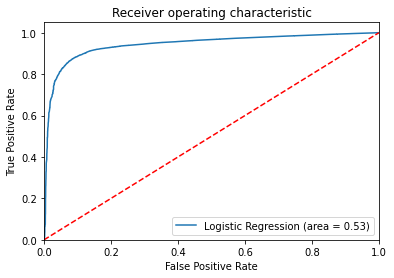

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).